1) Main objective of the analysis that also specifies whether your model will be 
focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data:

* Main objective of the analysis is to **recognize the hand written digits**.

* Model is focused on **Dimentionality Reduction**.

* Through this analysis, we can make the prediction that upto what percent of accuracy will the hand written digits be recognized by the model accurately.

2) Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis:

* Data set : load_digits dataset from sklearn set of datasets.

* Data set attributes : It consistes of the data that is in the form of matrix or array that forms the pixel of the image, it  contains the target column which contains the output, it has a column named frame, feature_names, target_names, etc.

* Outline on what is to be accomplished through the analysis: So, the attempt is to get maximum accuracy of recognizing the hand written digits by using the model.

3) Brief summary of data exploration and actions taken for data cleaning orfeature engineering.

* explored the "data" column to find the array that makes up the image of each digit.

* explored the "target" column to see the target/ output format.

* applied scalling on the dataset.

* applied train test split

* applied Logistic regression model with and wothout PCA.

4) Summary of training at least three variations of the unsupervised model you selected. For example, you can use different clustering techniques or different hyperparameters.

* 1. model1 - without PCA - accuracy - 97.2%
* 2. model2 - with PCA having 95% features - accuracy - 96.94%
* 3. model3 - with PCA having 30 features and svd_solver='randomized' -accuracy - 96.38%

5) A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms.

* The best of all was **model2** as it has reduced the features from 64 to 29 with a good accuracy score of 96.94%.

6) Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

* key findings: PCA is very hepful when there are lots of features and a lot from them are not that impactful to the target variable.

7) Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

* next steps: nest steps can be to more hyperparameter tune the model to get a prefect balance f the minimum number of features and maximum amount of accuracy.










In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
dataset = load_digits()
dir(dataset) 

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
dataset.data.shape

(1797, 64)

In [5]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
#conversion into numpy 2d array from 1d array of dataset using "reshape"
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

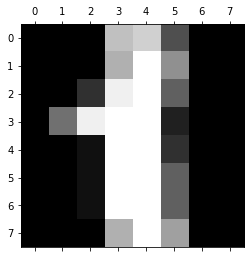

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.gray()
plt.matshow(dataset.data[1].reshape(8,8))

In [8]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
import numpy as np

np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
dataset.target[1]

1

In [11]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [12]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [13]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [14]:
X = df
y = dataset.target

#scaling is very important before applying PCA

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

#simple train_test_split and LogisticRegression model after scalling

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=30)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9722222222222222

#Using "PCA" and same LogisticRegression model after scalling - Hyperparameter tuning 

In [18]:
from sklearn.decomposition import PCA

pca = PCA(0.95)  # 0.95 means 95% of important features

X_pca = pca.fit_transform(X)
X_pca.shape   # 64 -----> 29 features

(1797, 29)

In [19]:
X_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [20]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [21]:
pca.n_components_

29

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=30)

In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9694444444444444

# Using PCA and with features reduced to only 2 features and svd solver as "full" - Hyperparameter Tuning 2

In [60]:
pca = PCA(n_components=30, svd_solver='randomized')

In [61]:
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 30)

In [62]:
X_pca

array([[ -1.25946643,  21.27488345,  -9.46305465, ...,  -0.94660709,
         -1.15665902,   2.40722623],
       [  7.95761126, -20.768699  ,   4.43950621, ...,  -0.48471931,
          2.33401486,   0.80730692],
       [  6.99192301,  -9.95598635,   2.95855801, ...,   2.18809974,
          0.80287426,  -0.61350874],
       ...,
       [ 10.80128367,  -6.96025227,   5.59955461, ...,   1.83031349,
          3.55608113,  -4.00940234],
       [ -4.87210004,  12.42395365, -10.17086651, ...,   0.9728951 ,
         -0.98697962,  -1.5474029 ],
       [ -0.34438963,   6.3655492 ,  10.77370852, ...,   1.31160997,
          2.56790705,  -6.64645881]])

In [63]:
pca.explained_variance_ratio_  

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905613,
       0.00889538, 0.00797116, 0.00767488, 0.00722901, 0.00695883,
       0.00596069, 0.00575601, 0.00515112, 0.00489473, 0.00428697])

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9638888888888889